         x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027
MSE Linear Regression: 9.401377787555104
RMSE Linear Regression: 3.0661666274935393
MSE Polynomial Regression: 1.3480931930431028
RMSE Polynomial Regression: 1.161074154842447


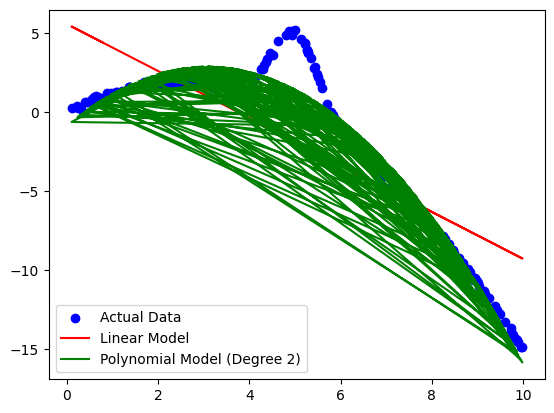

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/FinancialMarket.csv')

# Memeriksa isi dataset
print(data.head())

# Memisahkan fitur (X) dan target (y)
# Asumsikan kolom terakhir adalah target dan yang lainnya adalah fitur
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Regresi Linear Biasa
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediksi menggunakan model regresi linear biasa
y_pred_linear = linear_model.predict(X_test)

# Model Regresi Linear dengan Basis Fungsi (Polinomial Derajat 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Prediksi menggunakan model regresi linear dengan basis fungsi
y_pred_poly = poly_model.predict(X_poly_test)

# Menghitung MSE dan RMSE untuk kedua model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Menampilkan hasil perbandingan
print(f'MSE Linear Regression: {mse_linear}')
print(f'RMSE Linear Regression: {rmse_linear}')
print(f'MSE Polynomial Regression: {mse_poly}')
print(f'RMSE Polynomial Regression: {rmse_poly}')

# Visualisasi Hasil (jika X hanya 1 fitur)
if X_train.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.plot(X_test, y_pred_linear, color='red', label='Linear Model')
    plt.plot(X_test, y_pred_poly, color='green', label='Polynomial Model (Degree 2)')
    plt.legend()
    plt.show()
